In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
xl = pd.ExcelFile("OI Case study - data.xlsx")

In [9]:
xl.sheet_names

['Notes', 'Dataset A', 'Dataset B']

In [13]:
dataA = xl.parse("Dataset A")

In [18]:
dataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6197 entries, 0 to 6196
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           6190 non-null   float64       
 1   Date                 6188 non-null   datetime64[ns]
 2   Hour of day          6188 non-null   float64       
 3   Distance to vehicle  6188 non-null   float64       
 4   Converted to Trip    6188 non-null   float64       
 5   Start zone           6188 non-null   object        
 6   End zone             3453 non-null   object        
 7   Battery starting %   3453 non-null   float64       
 8   Battery ending %     3453 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 435.9+ KB


In [14]:
dataA.head()

,Session ID,Date,Hour of day,Distance to vehicle,Converted to Trip,Start zone,End zone,Battery starting %,Battery ending %
0,335401.0,2020-07-25,17.0,356.0,0.0,Zone Z,NaN,NaN,NaN
1,540099.0,2020-07-24,13.0,334.0,0.0,Zone W,NaN,NaN,NaN
2,555303.0,2020-07-26,23.0,225.0,0.0,Zone H,NaN,NaN,NaN
3,685698.0,2020-07-22,11.0,152.0,1.0,Zone N,Zone AC,33.0,27.0
4,704251.0,2020-07-16,19.0,23.0,1.0,Zone G,Zone Y,31.0,14.0


In [15]:
dataB = xl.parse("Dataset B")

In [19]:
dataB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                504 non-null    datetime64[ns]
 1   Zone name           504 non-null    object        
 2   Demand (sessions)   504 non-null    float64       
 3   Unconverted demand  504 non-null    float64       
 4   Trip starts         504 non-null    float64       
 5   Trip ends           504 non-null    float64       
 6   Active vehicles     504 non-null    float64       
 7   Zeroed vehicles     504 non-null    float64       
 8   Inactive vehicles   504 non-null    float64       
 9   Decayed vehicles    504 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 82.2+ KB


In [16]:
dataB.head()

,Date,Zone name,Demand (sessions),Unconverted demand,Trip starts,Trip ends,Active vehicles,Zeroed vehicles,Inactive vehicles,Decayed vehicles
0,2020-07-13,Warehouse,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
1,2020-07-13,Zone A,21.0,8.0,13.0,8.0,15.0,1.0,1.0,0.0
2,2020-07-13,Zone AA,3.0,2.0,1.0,3.0,5.0,2.0,1.0,0.0
3,2020-07-13,Zone AB,4.0,3.0,1.0,1.0,3.0,1.0,0.0,0.0
4,2020-07-13,Zone AC,4.0,2.0,2.0,1.0,4.0,0.0,0.0,0.0


# Top and Worse Performing Zones

Based on our trip data, which are our top performing zones and which
are our worst performing zones?

In [44]:
# Let's explore how many zones we have in dataA
dataA_zones = dataA['Start zone'].nunique()
print(f'The number of zones where trips begin in dataA are {dataA_zones}')
print('')
print(dataA['Start zone'].unique())

The number of zones where trips begin in dataA are 35

['Zone Z' 'Zone W' 'Zone H' 'Zone N' 'Zone G' 'Zone B' 'Zone L' 'Zone AH'
 'Zone A' 'Zone AA' 'Zone R' 'Zone S' 'Zone X' 'Zone M' 'Zone E' 'Zone Q'
 'Zone F' 'Zone AE' 'Zone I' 'Zone Y' 'Zone T' 'Zone D' 'Zone P' 'Zone O'
 'Zone AG' 'Zone AI' 'Zone K' 'Zone AD' 'Zone AF' 'Zone C' 'Zone V'
 'Zone AB' 'Zone AC' 'Zone U' 'Zone J' nan]


In [46]:
# Let's explore how many zones we have in dataB
dataB_zones = dataB['Zone name'].nunique()
print(f'The number of zones where trips begin in dataB are {dataB_zones}')
print('')
print(dataB['Zone name'].unique())

The number of zones where trips begin in dataB are 36

['Warehouse' 'Zone A' 'Zone AA' 'Zone AB' 'Zone AC' 'Zone AD' 'Zone AE'
 'Zone AF' 'Zone AG' 'Zone AH' 'Zone AI' 'Zone B' 'Zone C' 'Zone D'
 'Zone E' 'Zone F' 'Zone G' 'Zone H' 'Zone I' 'Zone J' 'Zone K' 'Zone L'
 'Zone M' 'Zone N' 'Zone O' 'Zone P' 'Zone Q' 'Zone R' 'Zone S' 'Zone T'
 'Zone U' 'Zone V' 'Zone W' 'Zone X' 'Zone Y' 'Zone Z' nan]


To find the top and worse performing zones we will group by zone and sum the number of 'Converted to Trip'

Those zones which no registry was kept will be removed

In [66]:
dataA = dataA[dataA['Start zone'].notna()]


In [73]:
performance_df = dataA.groupby(['Start zone'],sort=True)['Converted to Trip', 'Hour of day'].agg('sum').reset_index()
performance_df.sort_values(by = ['Converted to Trip'], ascending=[False])

<ipython-input-73-890d663cbece>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Start zone,Converted to Trip,Hour of day
15,Zone G,773.0,17876.0
10,Zone B,429.0,10319.0
12,Zone D,337.0,8199.0
24,Zone P,247.0,4585.0
0,Zone A,235.0,4677.0
19,Zone K,197.0,4990.0
27,Zone S,160.0,2866.0
16,Zone H,150.0,4314.0
13,Zone E,122.0,3599.0
14,Zone F,108.0,3301.0


In [70]:
fig = px.bar(performance_df, x='Start zone', y='Converted to Trip')
fig.show()

<Figure size 1152x576 with 0 Axes>

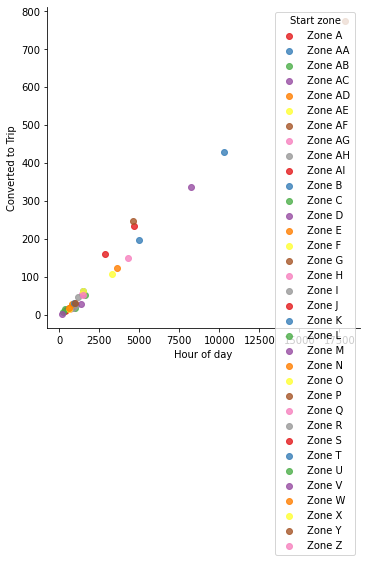

In [77]:
plt.figure(figsize = (16,8))

lm = sns.lmplot(x = "Hour of day", y = "Converted to Trip", hue = "Start zone", data = performance_df, palette="Set1", legend_out=False)

In [80]:
df = performance_df.sort_values(by = ['Converted to Trip'], ascending=[False])

fig = px.scatter(df, x="Start zone", y="Converted to Trip",
	         size="Hour of day", color="Start zone", size_max=60)
fig.show()